In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
features_name = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coeff', 'kernel_groove_length', 'target']

pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

wheat_seeds_df = pd.read_csv('~/uclax-data-science/UCI-ML-Seeds/data/seeds_dataset.csv', sep="\s+", 
            header=None, names=features_name, nrows=210)

In [3]:
wheat_seeds_df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
wheat_seeds_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Figure size 720x720 with 0 Axes>

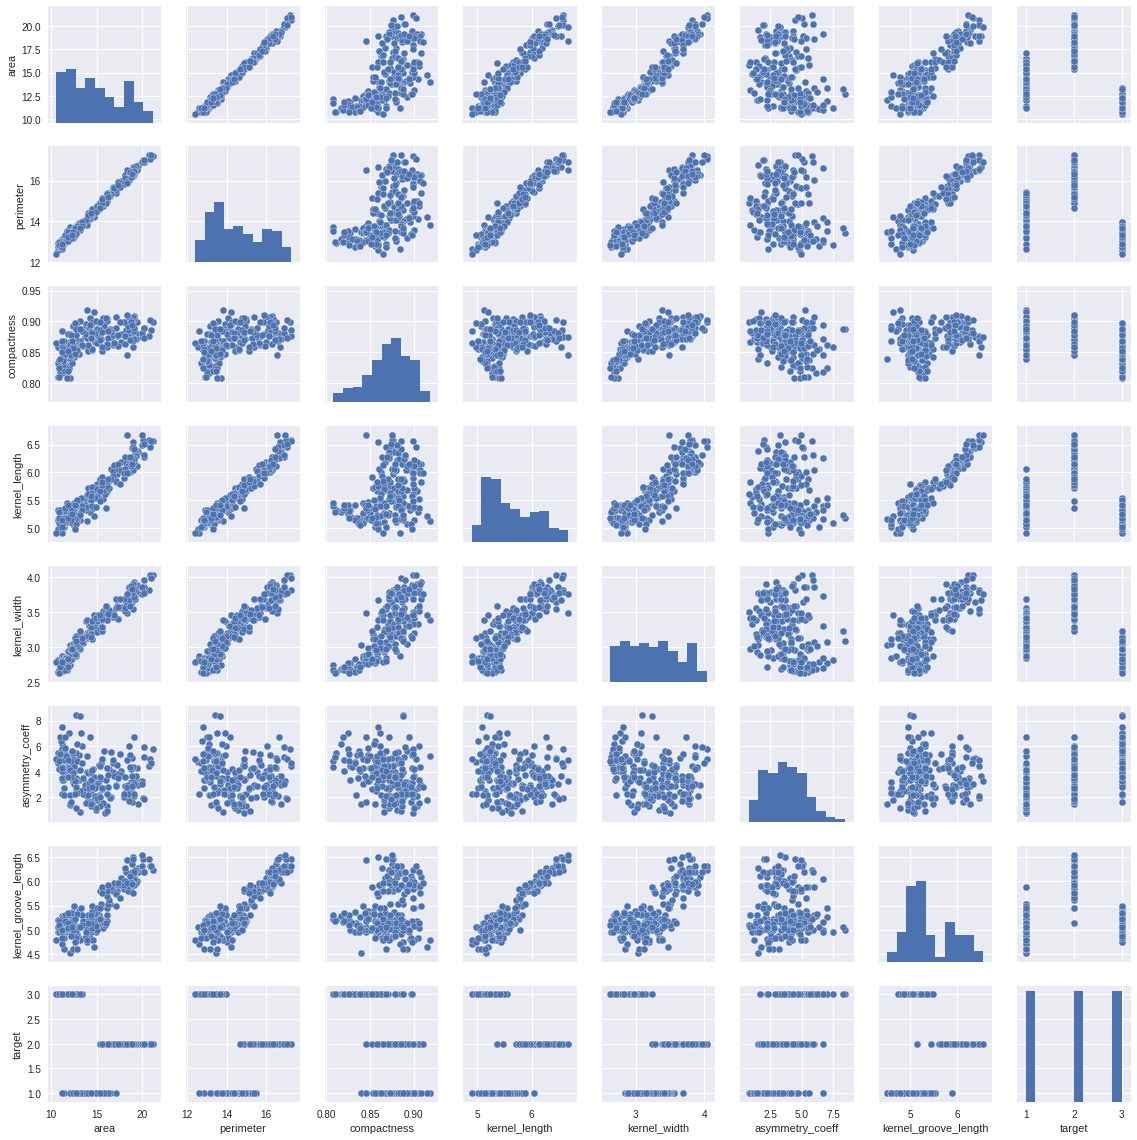

In [5]:
plt.figure(1, (10,10))

sns.pairplot(wheat_seeds_df, size=2, aspect=1)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(wheat_seeds_df)
wheat_seeds_2d = pca.fit_transform(features_scaled)

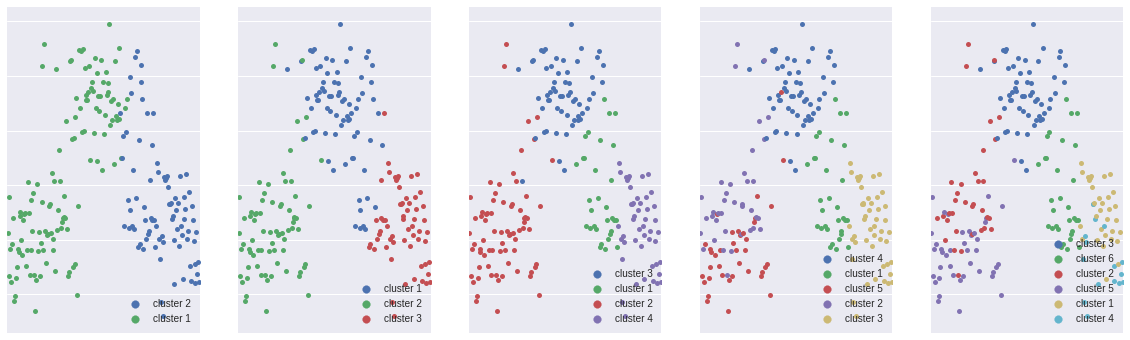

In [7]:
from sklearn.cluster import KMeans

number_of_clusters_1 = [2,3,4,5,6]

_, ax = plt.subplots(1,5, figsize=(20,6))

for i, clusters in enumerate(number_of_clusters_1):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(wheat_seeds_df)
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    sns.swarmplot(x=wheat_seeds_2d[:,0], y=wheat_seeds_2d[:,1], hue=labels, ax=ax[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].legend(loc='lower right')

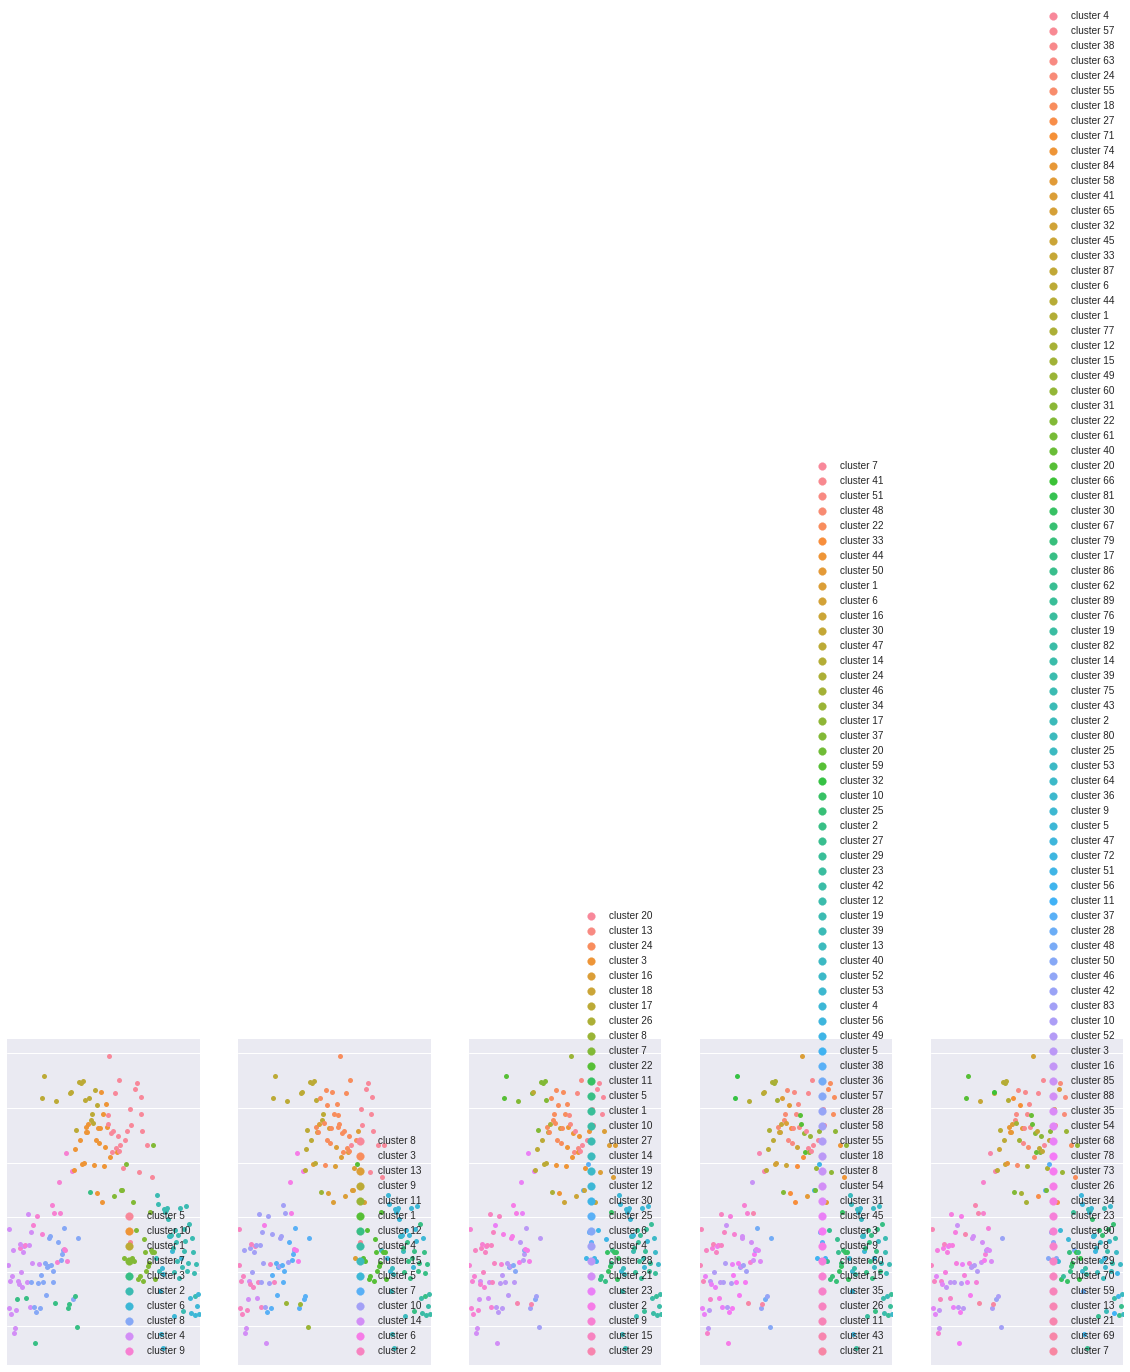

In [8]:
number_of_clusters_2 = [10,15,30,60,90]

_, ax = plt.subplots(1,5, figsize=(20,6))

for i, clusters in enumerate(number_of_clusters_2):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(wheat_seeds_df)
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    sns.swarmplot(x=wheat_seeds_2d[:,0], y=wheat_seeds_2d[:,1], hue=labels, ax=ax[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].legend(loc='lower right')

In [8]:
!pip install tqdm

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from time import time

In [10]:
%cd ~/uclax-data-science/UCI-ML-Seeds/data

/home/brian-cabanas/uclax-data-science/UCI-ML-Seeds/data


In [11]:
from bic import BIC

In [12]:
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time' : end, 'model' : model}

def process_results(results_list, data):
    df = pd.DataFrame(results_list)
    df['k'] = df.model.apply(lambda x: x.n_clusters)
    df['bic'] = df.model.apply(lambda x: BIC(x, data))
    df['sil_sc'] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index('k', inplace=True)
    return df 

In [13]:
#ks = [2,3,4,5,6,10,15,30,60,90]
ks = range(2, 50)

kmeans_models = []

X = wheat_seeds_df.drop('target', axis=1)

for k in tqdm(ks):
    kmeans_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X))
kmeans_models_df = process_results(kmeans_models, X)

100%|██████████| 48/48 [00:03<00:00, 12.00it/s]


In [14]:
import matplotlib.pyplot as plt

In [15]:
kmeans_models_df

,fit_time,model,bic,sil_sc
k,,,,
2,0.018726,"KMeans(algorithm='auto', copy_x=True, init='k-...",3990.746374,0.518287
3,0.023423,"KMeans(algorithm='auto', copy_x=True, init='k-...",3410.982073,0.471934
4,0.026450,"KMeans(algorithm='auto', copy_x=True, init='k-...",3247.428938,0.395360
5,0.032938,"KMeans(algorithm='auto', copy_x=True, init='k-...",3083.641286,0.361323
6,0.035630,"KMeans(algorithm='auto', copy_x=True, init='k-...",2931.497275,0.365233
7,0.040902,"KMeans(algorithm='auto', copy_x=True, init='k-...",2806.395458,0.354189
8,0.044048,"KMeans(algorithm='auto', copy_x=True, init='k-...",2702.053459,0.362074
9,0.043294,"KMeans(algorithm='auto', copy_x=True, init='k-...",2652.593246,0.355837
10,0.046462,"KMeans(algorithm='auto', copy_x=True, init='k-...",2596.328989,0.366996


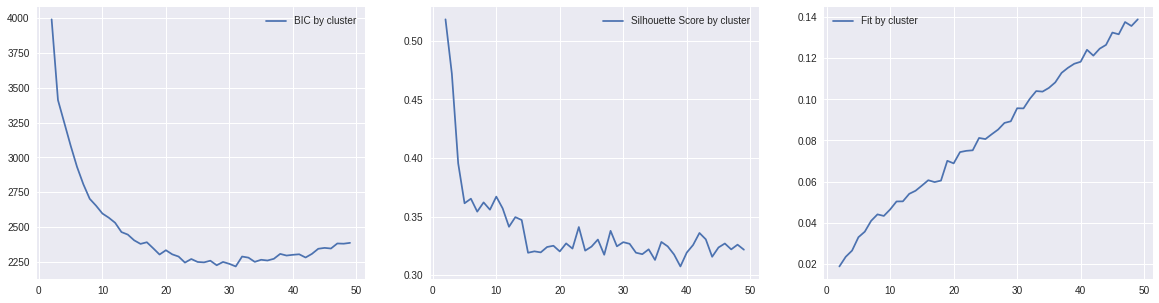

In [16]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_models_df.index, kmeans_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_models_df.index, kmeans_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_models_df.index, kmeans_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

In [21]:
X_sc = (X - X.mean())/X.std()
X_sc

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223
5,-0.160678,-0.267455,1.019976,-0.547401,0.141364,-0.823514,-0.919816
6,-0.054137,-0.053054,0.376710,-0.147910,0.001046,-0.075954,-0.384698
7,-0.253471,-0.351685,0.850695,-0.470662,0.114889,-0.665223,-0.830290
8,0.612598,0.689696,0.156645,0.958027,0.546432,-1.104182,0.954114
9,0.547299,0.528894,0.719503,0.576592,0.652332,-1.151404,0.254188


In [24]:
ks = range(2, 150)

kmeans_sc_models = []

#X = wheat_seeds_df.drop('target', axis=1)

for k in tqdm(ks):
    kmeans_sc_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), X_sc))
kmeans_sc_models_df = process_results(kmeans_sc_models, X_sc)

100%|██████████| 148/148 [00:31<00:00,  4.73it/s]


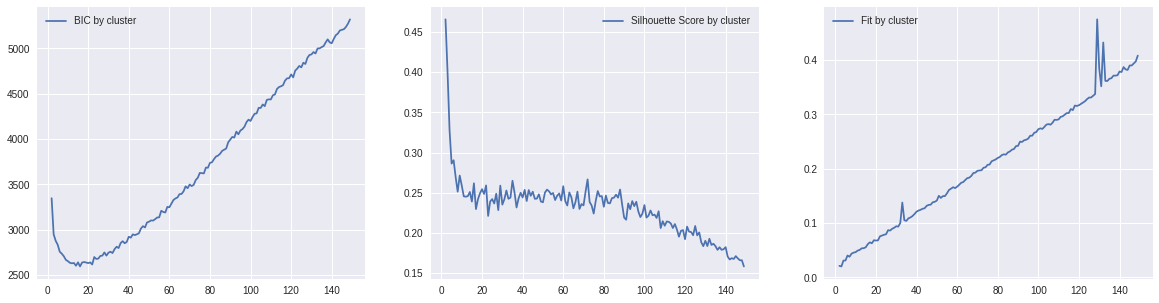

In [25]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.bic, label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.sil_sc, label='Silhouette Score by cluster')
ax[1].legend()
ax[2].plot(kmeans_sc_models_df.index, kmeans_sc_models_df.fit_time, label='Fit by cluster')
ax[2].legend()

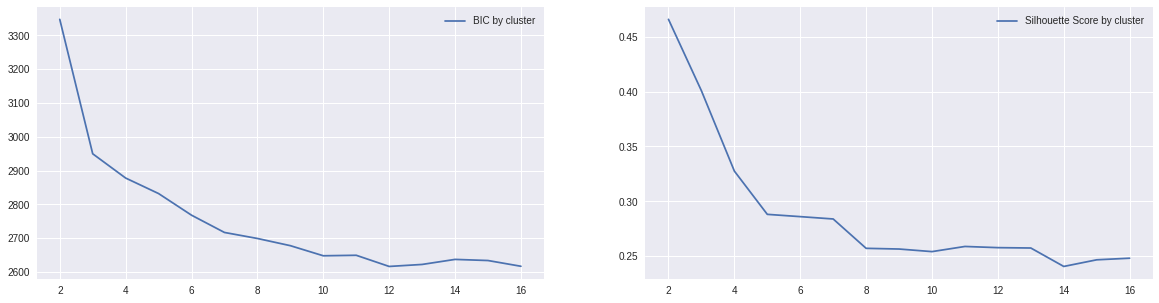

In [20]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.bic[:15], label='BIC by cluster')
ax[0].legend()
ax[1].plot(kmeans_sc_models_df.index[:15], kmeans_sc_models_df.sil_sc[:15], label='Silhouette Score by cluster')
ax[1].legend()

In [21]:
kmeans_2 = kmeans_sc_models_df.model.values[0]
kmeans_3 = kmeans_sc_models_df.model.values[1]
kmeans_4 = kmeans_sc_models_df.model.values[2]
kmeans_5 = kmeans_sc_models_df.model.values[3]
kmeans_6 = kmeans_sc_models_df.model.values[4]
#kmeans_10 = kmeans_sc_models_df.model.values[5]
#kmeans_15 = kmeans_sc_models_df.model.values[6]
#kmeans_30 = kmeans_sc_models_df.model.values[7]
#kmeans_60 = kmeans_sc_models_df.model.values[8]
#kmeans_90 = kmeans_sc_models_df.model.values[9]
kmeans_2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
target_df = wheat_seeds_df.drop('area', axis=1)
target_df = target_df.drop('perimeter', axis=1)
target_df = target_df.drop('compactness', axis=1)
target_df = target_df.drop('kernel_length', axis=1)
target_df = target_df.drop('kernel_width', axis=1)
target_df = target_df.drop('asymmetry_coeff', axis=1)
target_df = target_df.drop('kernel_groove_length', axis=1)

target_df_array = target_df['target'].values
target_df_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [24]:
kmeans_2.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

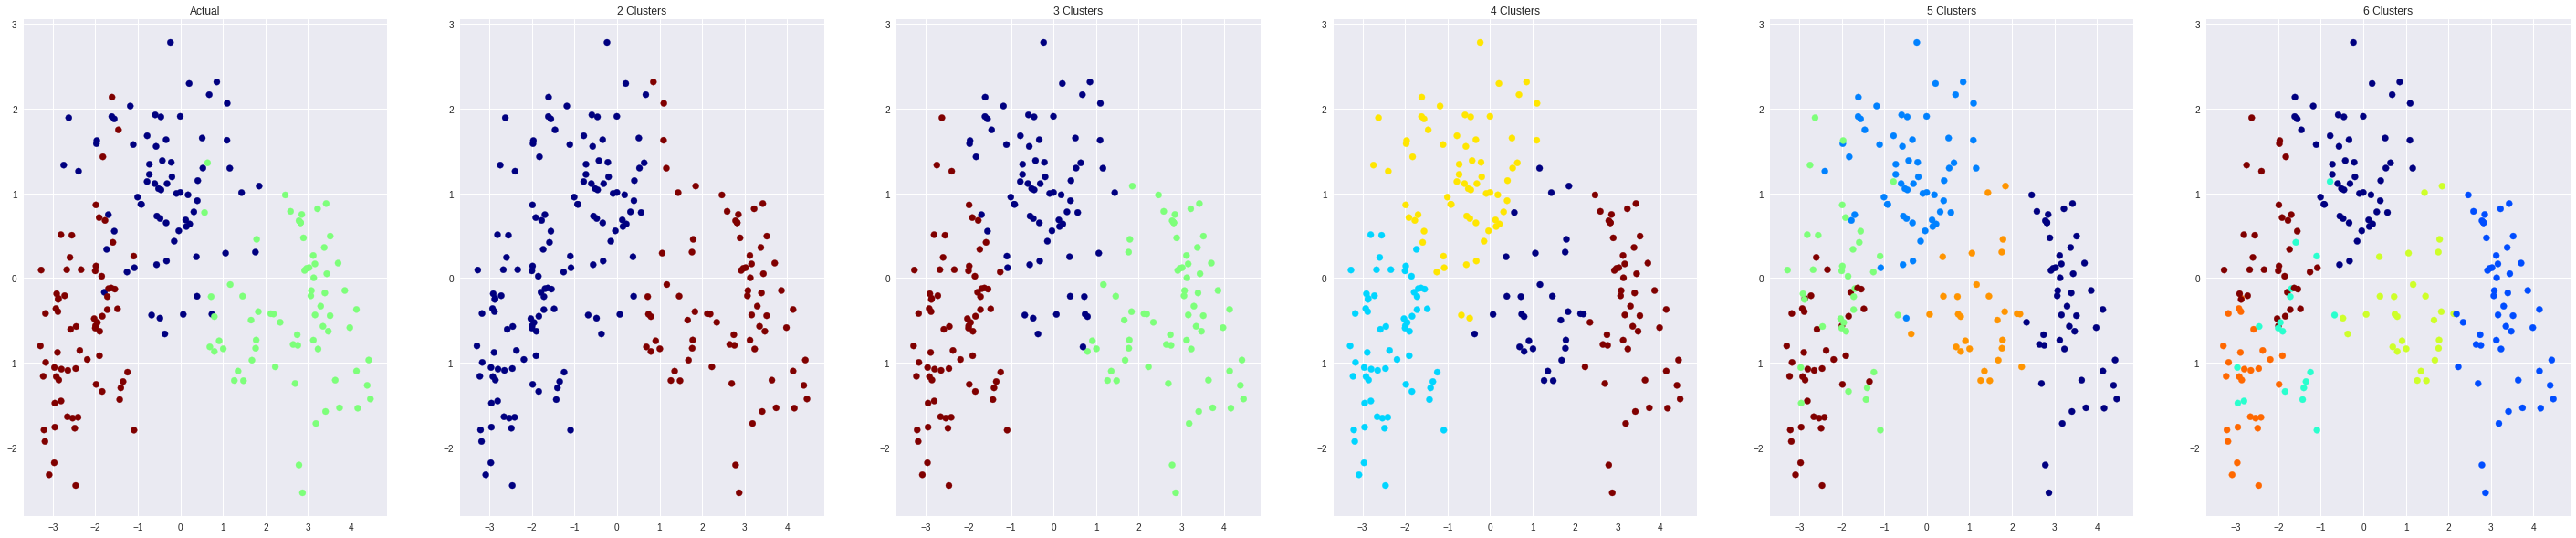

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

_, ax = plt.subplots(1,6, figsize=(50,10))
wheat_seeds_2d = pca.fit_transform(X_sc)

ax[0].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=target_df_array)
ax[0].set_title('Actual')
ax[1].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_2.labels_)
ax[1].set_title('2 Clusters')
ax[2].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_3.labels_)
ax[2].set_title('3 Clusters')
ax[3].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_4.labels_)
ax[3].set_title('4 Clusters')
ax[4].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_5.labels_)
ax[4].set_title('5 Clusters')
ax[5].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_6.labels_)
ax[5].set_title('6 Clusters');

Text(0.5,1,'3 Clusters')

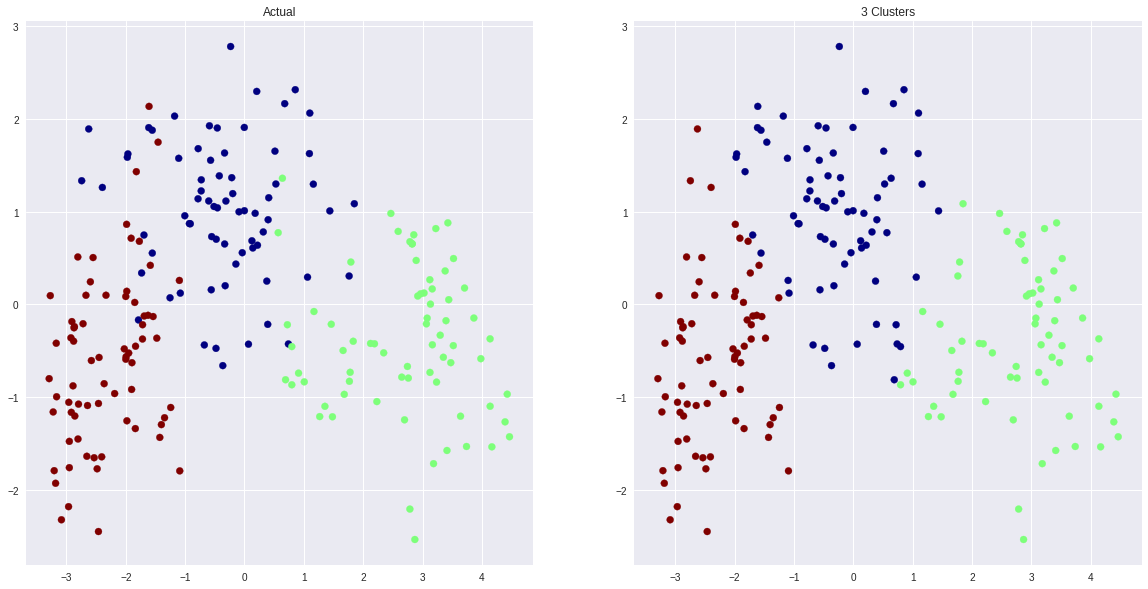

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#plt.figure()
#wheat_seeds_2d = pca.fit_transform(X_sc)
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=target_df_array)
#plt.title('Actual')

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

#plt.figure()
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_2.labels_)
#plt.title('2 Clusters')

#plt.figure()
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_3.labels_)
#plt.title('3 Clusters')

#plt.figure()
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_4.labels_)
#plt.title('4 Clusters')
#
#plt.figure()
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_5.labels_)
#plt.title('5 Clusters')
#
#plt.figure()
#plt.scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_6.labels_)
#plt.title('6 Clusters');

_, ax = plt.subplots(1,2, figsize=(20,10))
wheat_seeds_2d = pca.fit_transform(X_sc)

ax[0].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=target_df_array)
ax[0].set_title('Actual')
ax[1].scatter(wheat_seeds_2d[:, 0], wheat_seeds_2d[:, 1], cmap="jet", c=kmeans_3.labels_)
ax[1].set_title('3 Clusters')
